>__ACK:__ *** This whole code is developed by __Shama Satter__ ***

# __Create environment for running AI program__

> __Install libraris__ https://pypi.org

In [1]:
%pip install --upgrade pip
%pip install --user --upgrade pandas
%pip install --user --upgrade heartpy
%pip install --user --upgrade tsfel
%pip install --user --upgrade librosa
%pip install --user --upgrade statsmodels
%pip install --user --upgrade lightgbm
%pip install --user --upgrade catboost
%pip install --user --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


> __Import libraries and dependencies__

In [2]:
import pandas as pd
import numpy as np
import heartpy as hp
from   matplotlib import pyplot as plt
import tsfel
import scipy 
import sklearn as sk
from   sklearn.ensemble import RandomForestRegressor
#import librosa
import csv
import pandas as pd
import os
import xgboost as xgb
import random
import statsmodels.regression
from   warnings import filterwarnings
import lightgbm as ltb
from   sklearn import metrics
import catboost as cab
from   sklearn.model_selection import GridSearchCV
import time
from   datetime import datetime
from   sklearn.metrics import mean_squared_error, accuracy_score
from   sklearn.metrics import r2_score
from   IPython.display import clear_output
from sklearn.model_selection import KFold

# __Data collection & preprocessing__

> Mount Gdrive

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

> Inserting Data

In [3]:
## PPG Data
# define parent directory of PPG files
# PPG_dataDirectory = 'gdrive/My Drive/Colab Notebooks/SCI#02/DataBase/data/'
PPG_dataDirectory = './DataBase/Selected_PPG_wrist/'
# PPG CSV filenames
PPG_data =  [   
            '210823_4.csv',   
            '210830_0.csv',   
            '210927_0.csv',             
            '210927_1.csv',             
            '210927_2.csv',            
            '210928_0.csv',                       
            '210928_1.csv',          
            '210929_0.csv',           
            '210930_0.csv',            
            '210930_1.csv',            
            '210930_2.csv',           
            '210930_3.csv',            
            '210930_4.csv',           
            '210930_5.csv',         
            '211001_0.csv',         
            '211001_1.csv', 
            '211001_2.csv',
            '211018_1.csv',
            '211018_2.csv',
            '211018_3.csv',
            '211018_4.csv',
            '211019_0.csv',
            '211026_0.csv',
            '211026_1.csv',
            '211026_2.csv',
            '211026_3.csv',
            '211115_0.csv',
            '211115_1.csv',         
            ]
# Assigning complete filename of PPG CSV data
PPG_csvData = []
for fileName in PPG_data:
    PPG_csvData.append(PPG_dataDirectory+fileName)


## HbA1c data
HbA1c_data  =   [ 
                8.4,5.4,7.6,5.5,5.4,6.0,5.3,6.3,5.7,4.9,5.6,5.5,5.2,5.2,5.5,5.8,5.7,5.6,5.5,5.7,5.6,7.4,6.2,7.0,6.3,5.3,8.2,6.7
                ]


## SpO2 data
SpO2_data   =   [ 96,97,97,98,97,96,97,97,96,96,97,95,95,98,97,95,97,97,97,97,97,96,97,96,97,98,97,97                
                ]


## Age data
Age_data    =   [ 
                34,25,63,26,25,63,30,27,25,34,
                35
                ]


## Gender data
Gender_data =   [ 
                'M','F','M','M','F','M','F','M','M','M',
                'M','M','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M'
                ]


                
## BMI data
BMI_data    =   [ 
                28.71,23.6,28.71,24,23.6,23.3,27.9,25.8,25.82,19.71,22.72,33.96,20.64,22.04,25.26,20.6,20.4,33.3,26.4,22.2,30.1,28.71,19.6,25.8,29.1,32.8,30.4,21.7
                ]


print('*****************PPG_csvData******************')
print(PPG_csvData)
print('Data counted = '+ str(len(PPG_csvData)))
print('******************HbA1c_data******************')
print(HbA1c_data)
print('Data counted = '+ str(len(HbA1c_data)))
print('******************SpO2_data*******************')
print(SpO2_data)
print('Data counted = '+ str(len(SpO2_data)))
print('*******************Age_data*******************')
print(Age_data)
print('Data counted = '+ str(len(Age_data)))
print('*****************Gender_data******************')
print(Gender_data)
print('Data counted = '+ str(len(Gender_data)))


print('******************BMI_data********************')
print(BMI_data)
print('Data counted = '+ str(len(BMI_data)))

*****************PPG_csvData******************
['./DataBase/Selected_PPG_wrist/210823_4.csv', './DataBase/Selected_PPG_wrist/210830_0.csv', './DataBase/Selected_PPG_wrist/210927_0.csv', './DataBase/Selected_PPG_wrist/210927_1.csv', './DataBase/Selected_PPG_wrist/210927_2.csv', './DataBase/Selected_PPG_wrist/210928_0.csv', './DataBase/Selected_PPG_wrist/210928_1.csv', './DataBase/Selected_PPG_wrist/210929_0.csv', './DataBase/Selected_PPG_wrist/210930_0.csv', './DataBase/Selected_PPG_wrist/210930_1.csv', './DataBase/Selected_PPG_wrist/210930_2.csv', './DataBase/Selected_PPG_wrist/210930_3.csv', './DataBase/Selected_PPG_wrist/210930_4.csv', './DataBase/Selected_PPG_wrist/210930_5.csv', './DataBase/Selected_PPG_wrist/211001_0.csv', './DataBase/Selected_PPG_wrist/211001_1.csv', './DataBase/Selected_PPG_wrist/211001_2.csv', './DataBase/Selected_PPG_wrist/211018_1.csv', './DataBase/Selected_PPG_wrist/211018_2.csv', './DataBase/Selected_PPG_wrist/211018_3.csv', './DataBase/Selected_PPG_wrist/2

> Making array

In [4]:
PPG_csvArray  = np.asarray(PPG_csvData)
HbA1c_Array   = np.asarray(HbA1c_data)
SpO2_Array    = np.asarray(SpO2_data)
Age_Array     = np.asarray(Age_data)
Gender_Array  = np.asarray(Gender_data)
BMI_Array     = np.asarray(BMI_data)

# __User Defined Functions and Algorithms__

> __Function 00:__ Visualize PPG signal

In [4]:
def visual_PPG(PPG, drawFigure=True):

    for i in range (0,len(PPG)):
        
        # Getting corresponding Combined PPG Data 
        dat    = pd.read_csv(PPG[i], delimiter=',', header=None)
        print('********************************')
        print('Index='+str(i)+' || '+str(PPG[i]))
        print('********************************')
        if (dat.shape[1] == 3):
           bs = dat.iloc[:,2]
           gs = dat.iloc[:,1]
           rs = dat.iloc[:,0]
        else:
           bs = dat.iloc[:,3]
           gs = dat.iloc[:,2]
           rs = dat.iloc[:,1]
    
        # Visualization **Don't mention inside the pseudo code**
        if drawFigure:
           plt.rcParams.update(plt.rcParamsDefault)
           plt.rcParams['font.size'] = '8'
           fig,axs = plt.subplots(3, figsize=(20, 5))
           axs[0].set(title='Visualization of Wrist PPG Signal')
           axs[0].plot(bs, color='blue', label='blue signal')
           axs[0].set(ylabel = ' ')
           axs[0].legend(loc=1)
           axs[0].grid(True)
           axs[1].plot(gs, color='green', label='green signal')
           axs[1].set(ylabel = ' ', xlabel = ' ')
           axs[1].legend(loc=1)
           axs[1].grid(True)
           axs[2].plot(rs, color='red', label='red signal')
           axs[2].set(ylabel = ' ', xlabel = ' ')
           axs[2].legend(loc=1)
           axs[2].grid(True)
           plt.show()
        
    # Return
    return

> __Function 01:__ BA_Plot

In [5]:
def bland_altman_plot(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff,   c = 'black')
    plt.axhline(md,           color='green', linestyle='--')
    plt.axhline(md + 1.96*sd, color='red',   linestyle='--')
    plt.axhline(md - 1.96*sd, color='red',   linestyle='--')
    plt.xlabel("Average of the two measures", fontsize = 14)
    plt.ylabel("Difference between the two measures", fontsize = 14)
    plt.title("Bland-Altman plot for estimated %HbA1c values", fontsize = 14)
    # plt.savefig('./Figure/RF_trans_BA_Plot.png', bbox_inches = "tight", transparent = True, dpi = 400)

> __Function 02:__ EGA_Plot

In [6]:
from matplotlib.patches import Circle, Wedge, Polygon, Path
from matplotlib.collections import PatchCollection

def error_grid_analysis(ref,est):
    fig, ax = plt.subplots()

    polygons = []

    A  = [[4.0,4.0],[5.7,4.0],[5.7,5.4],[7.2,6.5],[12.0,6.5],[12.0,12.0],[6.5,12.0],[6.5,7.2],[5.4,5.7],[4.0,5.7]]
    Bd = [[5.7,4.0],[5.7,5.4],[7.2,6.5],[12.0,6.5],[12.0,5.7],[6.5,5.7],[6.5,4.0]]
    Bu = [[4.0,5.7],[5.4,5.7],[6.5,7.2],[6.5,12.0],[5.7,12.0],[5.7,6.5],[4.0,6.5]]
    Cd = [[6.5,4.0],[6.5,5.7],[12.0,5.7],[12.0,4.0]]
    Cu = [[4.0,6.5],[5.7,6.5],[5.7,12.0],[4.0,12.0]]

    # print(np.asarray(A).shape)
    pA  = Polygon(np.asarray(A))
    pBd = Polygon(np.asarray(Bd))
    pBu = Polygon(np.asarray(Bu))
    pCd = Polygon(np.asarray(Cd))
    pCu = Polygon(np.asarray(Cu))

    polygons.append(pA)
    polygons.append(pBd)
    polygons.append(pBu)
    polygons.append(pCd)
    polygons.append(pCu)


    p = PatchCollection(polygons)
    p.set_color([[0,1,0,0.3],[1,1,0,0.3],[1,1,0,0.3],[1,0,0,0.3],[1,0,0,0.3]])
    ax.add_collection(p)



    plt.plot([4.0,12.0],[4.0,12.0])


    x = ref
    y = est

    sA = []
    sB = []
    sC = []
    for i in range(len(y)):
        sA.append(int(pA.contains_point ([x[i],y[i]]))*30)
        sB.append(int(pBd.contains_point([x[i],y[i]]) or pBu.contains_point([x[i],y[i]]))*30)
        sC.append(int(pCd.contains_point([x[i],y[i]]) or pCu.contains_point([x[i],y[i]]))*30)


    plt.scatter(x,y,s=sA,color=[0.227, 0.513, 0.282,1])
    plt.scatter(x,y,s=sB,color=[0.886, 0.654, 0.133,1])
    plt.scatter(x,y,s=sC,color=[0.941, 0, 0.098,1])

    lx = np.linspace(min(x), max(x), 100)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(lx,p(lx))


    plt.text(10.5,9,'A',fontsize=26)
    plt.text(9,10.5,'A',fontsize=26)
    plt.text(10.5,5.94,'B',fontsize=26)
    plt.text(5.94,10.5,'B',fontsize=26)
    plt.text(10.5,4.7,'C',fontsize=26)
    plt.text(4.7,10.5,'C',fontsize=26)
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.xlim([4.0,12.0])
    plt.ylim([4.0,12.0])
    plt.xlabel('HbA1c Invasive device (%NGSP)',fontsize=15)
    plt.ylabel('HbA1c Estimated (%NGSP)',fontsize=15)
    plt.title('Error Grid Analysis (EGA) for estimated %HbA1c values',fontsize=15)
    plt.show()

> __Function 03:__ Evaluation
>> ACK: __Developed by Shama__. _To visualize performance and evaluate model_

In [7]:
def evaluation_metrics_including_BA_and_EGA_plot(modelName, predictedValue, exactValue):
    print('############ HbA1c Evaluation Metrics of ' + modelName + ' Regression ############')
    CVy = np.asarray(predictedValue)
    CVx = np.asarray(exactValue)
    print('Diff STD  = ',np.std(CVx-CVy))
    print('MSE       = ',np.sum((CVx-CVy)**2)/CVy.shape[0])
    print('ME        = ',np.sum((CVx-CVy))/CVy.shape[0])
    print('MAD       = ',np.sum(np.abs(CVx-CVy))/CVy.shape[0])
    print('RMSE      = ',np.sqrt(np.sum((CVx-CVy)**2)/CVy.shape[0]))
    print('R2 score  = ',r2_score(CVx,CVy))
    print('Pearson R and p-value: ',scipy.stats.pearsonr(CVx,CVy))
    print('##################################################################################\n')
    bland_altman_plot  (predictedValue, exactValue)
    error_grid_analysis(predictedValue, exactValue)

> __Algorithm 01:__ Baseline Dirft Removal by ()
>> ACK: __Developed by Shama__. _This algorithm ()_
>> 1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
>> 2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

In [8]:
### Initialize Second Order Section
sos  = scipy.signal.butter(N=2, Wn=8.0, btype='low',  fs=32, output='sos')  ### The sampling frequency of the digital system(‘fs’).second-order sections (‘sos’)
sos1 = scipy.signal.butter(N=2, Wn=0.5, btype='high', fs=32, output='sos')  ###
def removing_baseline_drift (ppgSignal, showFigure='False'): 
   # Getting corresponding Combined PPG Data 
   dat   = pd.read_csv(ppgSignal, delimiter=',', header=None)
   if (dat.shape[1] == 3):
      bs = dat.iloc[:,2]
      gs = dat.iloc[:,1]
      rs = dat.iloc[:,0]
   else:
      bs = dat.iloc[:,3]
      gs = dat.iloc[:,2]
      rs = dat.iloc[:,1]
   fil_s_b = scipy.signal.sosfilt(sos, bs)[10:]
   fil_s_g = scipy.signal.sosfilt(sos, gs)[10:]
   fil_s_r = scipy.signal.sosfilt(sos, rs)[10:]

   fil_s_b1 = scipy.signal.sosfilt(sos1, fil_s_b)[110:] + np.mean(fil_s_b)
   fil_s_g1 = scipy.signal.sosfilt(sos1, fil_s_g)[110:] + np.mean(fil_s_g)
   fil_s_r1 = scipy.signal.sosfilt(sos1, fil_s_r)[110:] + np.mean(fil_s_r)
   
   ### Visualization
   if showFigure=='True':
      print('***************Blue**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_b), color='blue', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_b1), color='blue', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()

      print('***************Green**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_g), color='green', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_g1), color='green', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()
      
      print('***************Red**************')
      plt.rcParams.update(plt.rcParamsDefault)
      plt.rcParams['font.size'] = '9'
      fig,axs = plt.subplots(2, figsize=(20, 2.5))
      axs[0].set(title='Visualization of PPG Signal before and after filtering')
      axs[0].plot(pd.DataFrame(fil_s_r), color='red', label='after first filtering')
      axs[0].set(ylabel = ' ', xlabel = ' ')
      axs[0].legend(loc=1)
      axs[0].grid(True)
      axs[1].plot(pd.DataFrame(fil_s_r1), color='red', label='After 2nd filter and baseline_drift_removal')
      axs[1].set(ylabel = ' ', xlabel = ' ')
      axs[1].legend(loc=1)
      axs[1].grid(True)
      plt.show()

   ## Return outcome
   return(fil_s_r1, fil_s_g1, fil_s_b1)

>> Test Algorithm 01:

In [12]:
# for i in range(len(PPG_csvArray)):
#     print(f'**********PPG_info:{PPG_csvArray[i]}**********')
#     r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray[i], showFigure='True')

> __Algorithm 02:__ splitSignal into discrete segments

In [9]:
def splitSignal (individualSignal, horizonSize=50, windowSize=200):
    overallSignal  = []
    completeFlag   = 0
    for i in range (0, len(individualSignal), horizonSize):
        if i+windowSize < len(individualSignal): #Only consider sets with windowSize data
            splittedSignal = []
            for j in range(windowSize):
                splittedSignal.append(individualSignal[i+j])
            overallSignal.append(splittedSignal)
    x = np.array(overallSignal) 
    return (x)

>> Test algorithm 02

(30, 110)
(117, 110)
(121, 110)
(100, 110)
(102, 110)
(48, 110)
(111, 110)
(113, 110)
(81, 110)
(95, 110)
(69, 110)
(65, 110)
(108, 110)
(111, 110)
(90, 110)
(111, 110)
(122, 110)
(58, 110)
(100, 110)
(91, 110)
(115, 110)
(104, 110)
(120, 110)
(144, 110)
(81, 110)
(67, 110)
(162, 110)
(127, 110)
dCount=303930


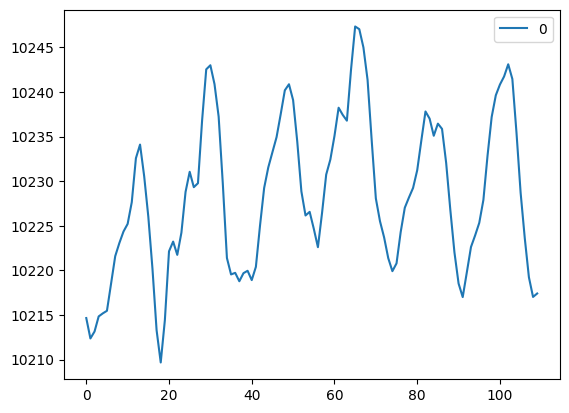

In [10]:
horizonSet = 7*4
windowSet  = 110
countData  = 0
for i in range(len(PPG_csvArray)):
    r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray[i], showFigure='False')
    r_ = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
    print(r_.shape)
    countData += r_.shape[0]*r_.shape[1]
print(f'dCount={countData}')
### Plotting on the first one
pd.DataFrame(r_[0]).plot()
plt.show()

> __Algorithm 03:__ Butter BandPass Filter (Include this in SCI)
>> 1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
>> 2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
>> 3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html#scipy.signal.sosfilt

In [11]:
def butter_filter(xArray, cutoffFreq=8, samplingFreq=32, filterOrder=2, filterType='low'):
    nyquistFreq  = 0.5 * samplingFreq
    criticalFreq = cutoffFreq/nyquistFreq
    # Butterworth digital and analog filter design.
    if filterType == 'band':
        sos = scipy.signal.butter(N=filterOrder, Wn=[0.1, criticalFreq], btype='bandpass', analog=False, output='sos')
    elif filterType == 'low':
        sos = scipy.signal.butter(N=filterOrder, Wn=criticalFreq,        btype='lowpass',  analog=False, output='sos')
    elif filterType == 'high':
        sos = scipy.signal.butter(N=filterOrder, Wn=criticalFreq,        btype='highpass', analog=False, output='sos')
    # Filter data along one-dimension with an IIR or FIR filter.
    y = scipy.signal.sosfilt(sos=sos, x=xArray)
    return y

>> Test Algorithm 03

Actual Splitted Signal


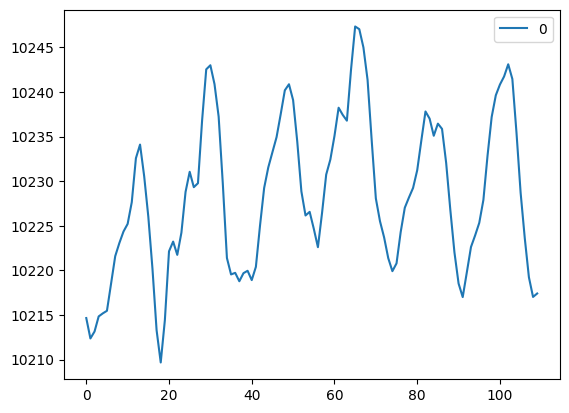

After applying mean function


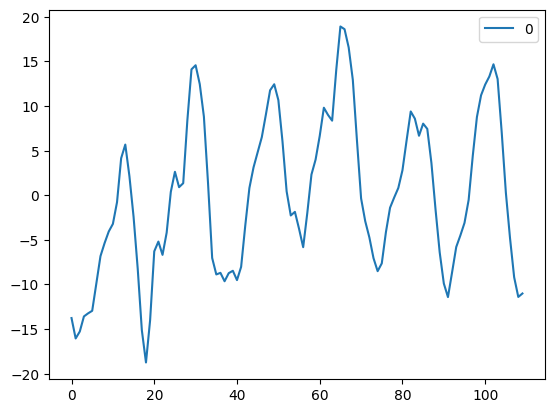

After applying filter


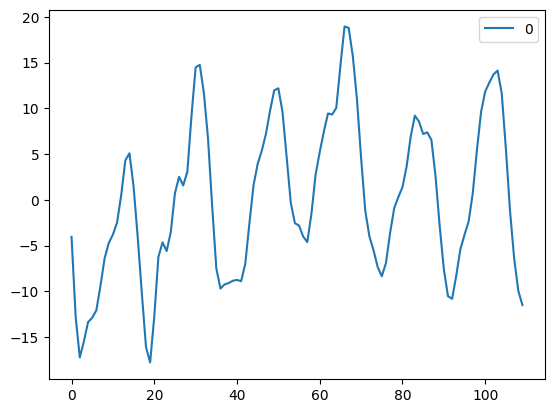

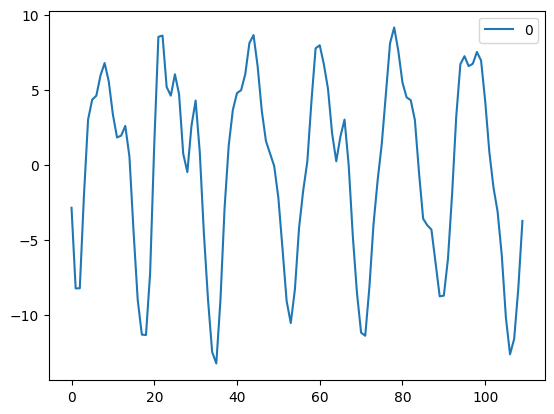

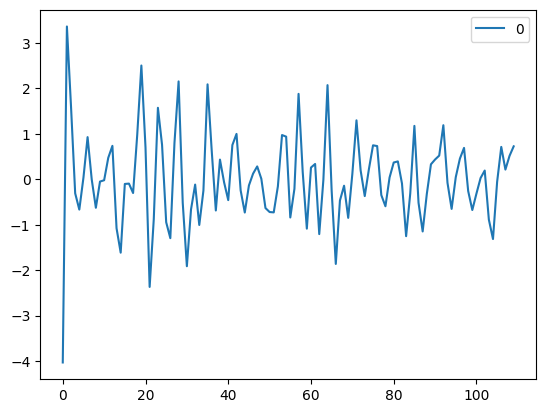

In [12]:
print('Actual Splitted Signal')
pd.DataFrame(r_[0]).plot()
plt.show()
print('After applying mean function')
data = r_[0]-np.mean(r_[0])
pd.DataFrame(data).plot()
plt.show()
print('After applying filter')
filteredSignal_lp = butter_filter(xArray=data, cutoffFreq=8, samplingFreq=32, filterOrder=2, filterType='low')
filteredSignal_bp = butter_filter(xArray=data, cutoffFreq=8, samplingFreq=32, filterOrder=2, filterType='band')
filteredSignal_hp = butter_filter(xArray=data, cutoffFreq=8, samplingFreq=32, filterOrder=2, filterType='high')
pd.DataFrame(filteredSignal_lp).plot()
pd.DataFrame(filteredSignal_bp).plot()
pd.DataFrame(filteredSignal_hp).plot()
plt.show()

> __Algorithm 04:__ Determine AC_DC_from_Signal __(I have replaced with a new algorithm)__
>> ACK: __Developed by Shama__. _This algorithm is developed to determine __r1__ and __r2__ which significantly improve the performance of the trained models_

In [16]:
# def determine_ac_dc_from_PPG (Signal):
#     uPeak =  scipy.signal.find_peaks(Signal)
#     uPeak =  pd.DataFrame(uPeak[0])
#     lPeak =  scipy.signal.find_peaks(-Signal)
#     lPeak =  pd.DataFrame(lPeak[0])

#     if (len(uPeak)<len(lPeak)):
#         indexLength = len(uPeak)
#     else:
#         indexLength = len(lPeak)

#     for index in range(indexLength):
#         newValue_ac =  Signal[uPeak.iloc[index]] - Signal[lPeak.iloc[index]]
#         newValue_dc =  Signal[lPeak.iloc[index]]
#         if index ==0:
#             allValue_ac = newValue_ac
#             allValue_dc = newValue_dc
#         else:
#             allValue_ac =  np.append(allValue_ac,newValue_ac)
#             allValue_dc =  np.append(allValue_dc,newValue_dc)

#     meanValue_ac = np.mean(allValue_ac)
#     meanValue_dc = np.mean(allValue_dc)

#     return meanValue_ac,meanValue_dc

> __Algorithm 04:__ Determine AC_DC_from_PPG (new developed)
>> ACK: __Developed by Shama__. _This algorithm is developed to determine __r1__ and __r2__ which significantly improve the performance of the trained models_

In [14]:
def determine_ac_dc_from_PPG (Signal, showFigure='False'):
    maxArray = []
    minArray = []
    p2pPanDF = pd.DataFrame({'index':[], 'value':[]})
    midValue = np.mean(Signal)
    maxValue = midValue
    minValue = midValue
    maxIndex = 0
    minIndex = 0

    for i in range(len(Signal)):
        nowValue = Signal[i]
        if (nowValue>midValue):
            if (minValue<midValue and minIndex>0):
                p2pPanDF = pd.concat([p2pPanDF, pd.DataFrame({'index':[minIndex], 'value':[minValue]})], ignore_index=True, sort=False)
                minArray = np.append(minArray, minValue)
                minValue = midValue
            if (nowValue>maxValue):
                maxValue = nowValue
                maxIndex = i
        if (nowValue<midValue):
            if (maxValue>midValue and maxIndex>0):
                p2pPanDF = pd.concat([p2pPanDF, pd.DataFrame({'index':[maxIndex], 'value':[maxValue]})], ignore_index=True, sort=False)
                maxArray = np.append(maxArray, maxValue)
                maxValue = midValue
            if (nowValue<minValue):
                minValue = nowValue
                minIndex = i

    ## Calculate AC and DC
    acSignal = np.mean(maxArray) - np.mean(minArray)
    dcSignal = np.mean(minArray)

    ## Show Figure
    if (showFigure=='True'):
        plt.rcParams.update(plt.rcParamsDefault)
        plt.rcParams['font.size'] = '9'
        plt.figure(figsize=(21, 3))
        plt.title(f'***Analyze AC and DC Characteristics in a PPG Signal*** \n AC={acSignal} and DC={dcSignal} \n Total Peaks={len(maxArray)}(mean={np.mean(maxArray)}) and Valley={len(minArray)}(mean={np.mean(minArray)})', y=1, loc='center')
        plt.xlabel('Sample Count')
        plt.ylabel(' ')
        for i in range(len(Signal)):
            plt.plot(i, midValue,          '.', color='green')
            plt.plot(i, np.mean(maxArray), '.', color='blue')
            plt.plot(i, np.mean(minArray), '.', color='cyan')
        plt.plot(Signal, color='gray')
        plt.plot(p2pPanDF.values[:,0], p2pPanDF.values[:,1], 'x', color='red')
        plt.grid(True)
        plt.show()

    #return acSignal, dcSignal, maxArray,minArray,p2pPanDF
    return acSignal, dcSignal

>> Only to develop algorithm

In [18]:
# def determine_ac_dc_from_PPG (Signal):
#     maxArray = []
#     minArray = []
#     midValue = np.mean(Signal)
#     maxValue = midValue
#     minValue = midValue
#     maxIndex = 0
#     minIndex = 0

#     for i in range(len(Signal)):
#         nowValue = Signal[i]
#         if (nowValue>midValue):
#             if (minValue<midValue and minIndex>0):
#                 minArray = np.append(minArray, minValue)
#                 minValue = midValue
#             if (nowValue>maxValue):
#                 maxValue = nowValue
#                 maxIndex = i
#         if (nowValue<midValue):
#             if (maxValue>midValue and maxIndex>0):
#                 maxArray = np.append(maxArray, maxValue)
#                 maxValue = midValue
#             if (nowValue<minValue):
#                 minValue = nowValue
#                 minIndex = i

#     ## Calculate AC and DC
#     acSignal = np.mean(maxArray) - np.mean(minArray)
#     dcSignal = np.mean(minArray)

#     return acSignal, dcSignal

> Test with Algorithm 4

In [15]:
r,g,b = removing_baseline_drift(ppgSignal=PPG_csvArray[1], showFigure='False')

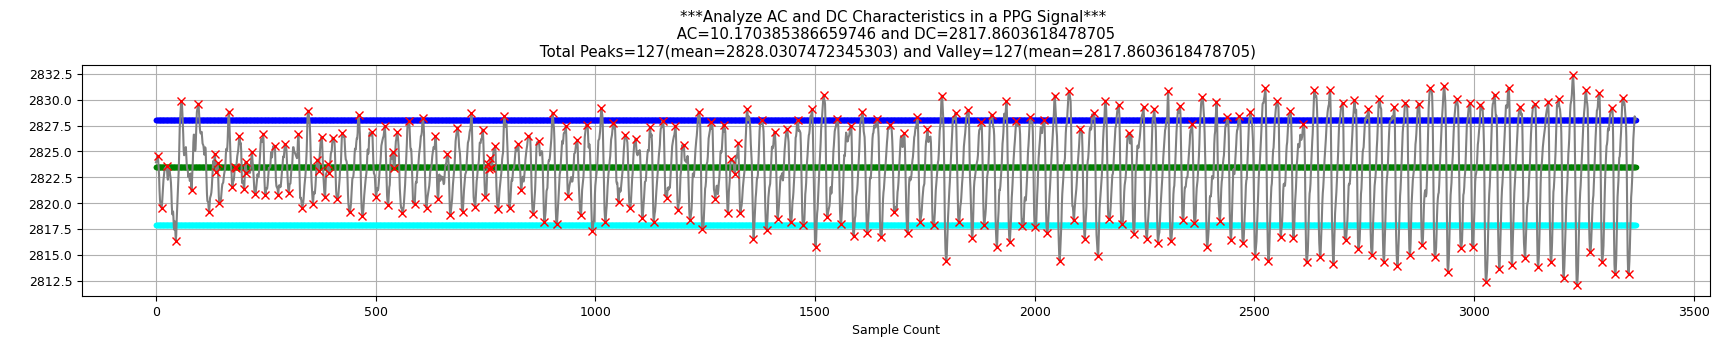

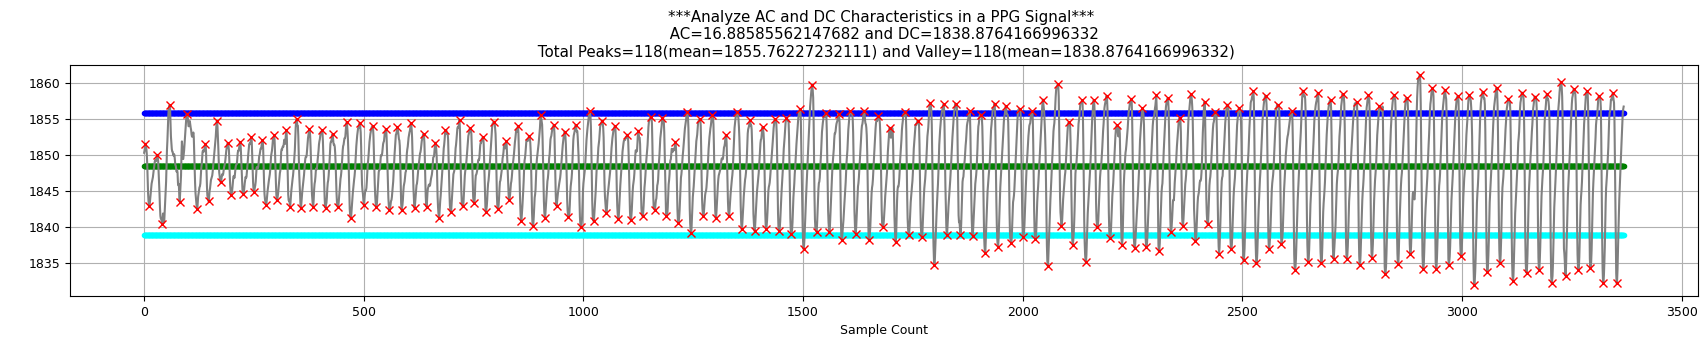

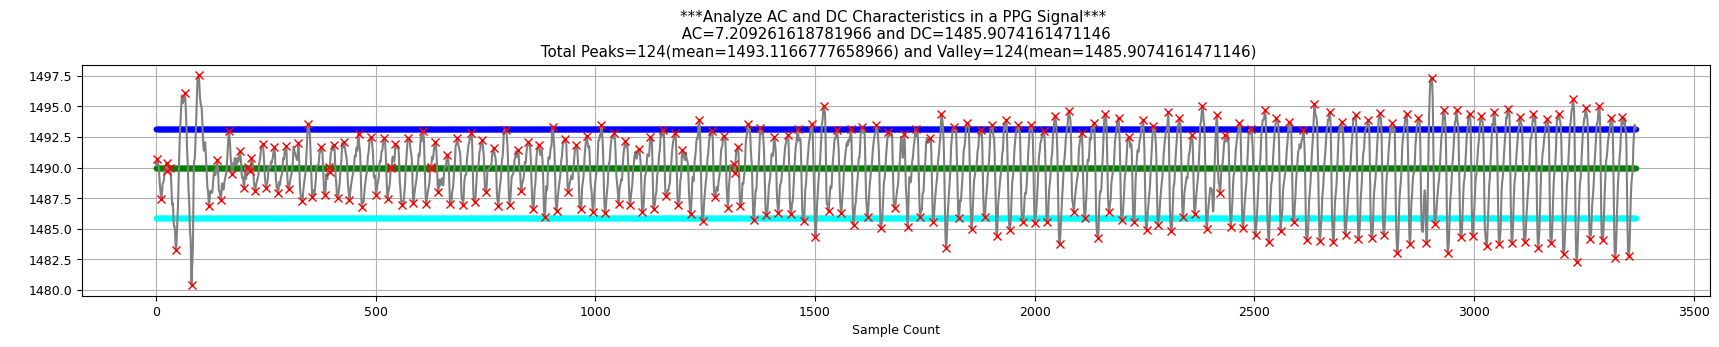

In [15]:
ac, dc, u, l, df = determine_ac_dc_from_PPG(r, showFigure='True')
ac, dc, u, l, df = determine_ac_dc_from_PPG(g, showFigure='True')
ac, dc, u, l, df = determine_ac_dc_from_PPG(b, showFigure='True')

> __Algorithm 05:__ Kaiser–Teager Energy

In [16]:
def get_kaiser_teager_energy(x):
    x         = np.array(x)
    l         = len(x)
    squ       = x[1:l-1]**2
    oddi      = x[0:l-2]
    eveni     = x[2:l]
    ex        = squ - (oddi*eveni)
    kte       = np.zeros([l,])
    kte[0]    = ex[0]
    kte[-1]   = ex[-1]
    kte[1:-1] = ex
    return kte

> __Algorithm 06v1:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_
>> ACK: __Developed by Shama, Guided by Honorable Professor Kim__. _Significantly improve the performance_

In [22]:
def construct_feature_set_v1 (PPG, HbA1c, SpO2, BMI, samplingRate=32):
    # Initialization
    sr         = samplingRate
    l          = 0

    for i in range (0,len(PPG)):
        
        # Getting corresponding PPG Data
        # > __Algorithm 01:__ Baseline Dirft Removal by () 
        r,g,b = removing_baseline_drift(ppgSignal=PPG[i], showFigure='False')
        print('PPG_data_info:'+str(PPG[i]))

        # > __Algorithm 04:__ Determine AC_DC_from_Signal
        r_ac,r_dc,r_pk,r_vy,r_df = determine_ac_dc_from_PPG(r)
        g_ac,g_dc,g_pk,g_vy,g_df = determine_ac_dc_from_PPG(g)
        b_ac,b_dc,b_pk,b_vy,b_df = determine_ac_dc_from_PPG(b)

        # Calculate r1 & r2
        r1 = (g_ac/g_dc)/(r_ac/r_dc)
        r2 = (b_ac/b_dc)/(r_ac/r_dc)

        # > __Algorithm 02:__ Split_Signal
        r_sp = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
        g_sp = splitSignal(individualSignal=g, horizonSize=horizonSet, windowSize=windowSet)
        b_sp = splitSignal(individualSignal=b, horizonSize=horizonSet, windowSize=windowSet)
        
        # Constructing Feature Set
        for j in range(len(r_sp)):  ### You can also use r_sp.shape[0]
            # Initialize frame
            featureFrame       = []
            
            # >>>>>>>>>>>>>>>>Red>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # > __Algorithm 03:__ Filter
            filteredSignal_r = butter_filter(xArray=r_sp[j]-np.mean(r_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')

            fqSignal_r, psdSignal_r    = scipy.signal.welch(
                x       = filteredSignal_r, 
                nperseg = len(filteredSignal_r) # Added to overcome error
                ) 


            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_r            = get_kaiser_teager_energy(
                filteredSignal_r
                )



            # Insert Feature one by one
            # Add new feature (5)
            ar_coeffs_r, _r        = statsmodels.regression.linear_model.yule_walker(filteredSignal_r, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_r)
            
            # Add new feature
            zcSignal_r             = tsfel.feature_extraction.features.zero_cross(filteredSignal_r)
            featureFrame           = np.append(featureFrame,zcSignal_r)
            
            # Add new feature
            skewSignal_r           = tsfel.feature_extraction.features.skewness(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,skewSignal_r)
            
            # Add new feature
            absWavelength_r        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_r)
            maWavelength_r         = np.mean(absWavelength_r)
            # featureFrame           = np.append(featureFrame,maWavelength_r)
            
            # Add new feature
            autocorr_r             = tsfel.feature_extraction.autocorr(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,autocorr_r)
            
            # Add new feature
            kurtSpectral_r         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_r)
            
            # Add new feature
            skewSpectral_r         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_r)
            
            # Add new feature
            sum_abs_diff_r         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_r)
            featureFrame           = np.append(featureFrame,sum_abs_diff_r)
            
            # Add new feature
            kurtPSD_r              = scipy.stats.kurtosis(psdSignal_r)
            # featureFrame           = np.append(featureFrame,kurtPSD_r)
            
            # Add new feature
            varPSD_r               = np.var(psdSignal_r)
            featureFrame           = np.append(featureFrame,varPSD_r)
            
            # Add new feature
            meanPSD_r              = np.mean(psdSignal_r)
            # featureFrame           = np.append(featureFrame,meanPSD_r)
            
            # Add new feature
            skewKTE_r              = scipy.stats.skew(kteSignal_r)
            # featureFrame           = np.append(featureFrame,skewKTE_r)
            
            # Add new feature
            kurtKTE_r              = scipy.stats.kurtosis(kteSignal_r)
            # featureFrame           = np.append(featureFrame,kurtKTE_r)
            
            # Add new feature
            varKTE_r               = np.var(kteSignal_r)
            featureFrame           = np.append(featureFrame,varKTE_r)
            
            # Add new feature
            meanKTE_r              = np.mean(kteSignal_r)
            # featureFrame           = np.append(featureFrame,meanKTE_r)
            
            
            # >>>>>>>>>>>>>>>>Green>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
           
            # > __Algorithm 03:__ Butter Low-pass Filter
            filteredSignal_g = butter_filter(xArray=g_sp[j]-np.mean(g_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')


            fqSignal_g, psdSignal_g    = scipy.signal.welch(
                x       = filteredSignal_g, 
                nperseg = len(filteredSignal_g) # Added to overcome error
                ) 
           
            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_g            = get_kaiser_teager_energy(
                filteredSignal_g
                )
            
            
            # Insert Feature one by one
            # Add new feature
            ar_coeffs_g, _g        = statsmodels.regression.linear_model.yule_walker(filteredSignal_g, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_g)
            
            # Add new feature
            zcSignal_g             = tsfel.feature_extraction.features.zero_cross(filteredSignal_g)
            featureFrame           = np.append(featureFrame,zcSignal_g)
            
            # Add new feature
            skewSignal_g           = tsfel.feature_extraction.features.skewness(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,skewSignal_g)
            
            # Add new feature
            absWavelength_g        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_g)
            maWavelength_g         = np.mean(absWavelength_g)
            # featureFrame           = np.append(featureFrame,maWavelength_g)
            
            # Add new feature
            autocorr_g             = tsfel.feature_extraction.autocorr(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,autocorr_g)
            
            # Add new feature
            kurtSpectral_g         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_g)
            
            # Add new feature
            skewSpectral_g         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_g)
            
            # Add new feature
            sum_abs_diff_g         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_g)
            featureFrame           = np.append(featureFrame,sum_abs_diff_g)
            
            # Add new feature
            kurtPSD_g              = scipy.stats.kurtosis(psdSignal_g)
            # featureFrame           = np.append(featureFrame,kurtPSD_g)
            
            # Add new feature
            varPSD_g               = np.var(psdSignal_g)
            featureFrame           = np.append(featureFrame,varPSD_g)
            
            # Add new feature
            meanPSD_g              = np.mean(psdSignal_g)
            # featureFrame           = np.append(featureFrame,meanPSD_g)
            
            # Add new feature
            skewKTE_g              = scipy.stats.skew(kteSignal_g)
            # featureFrame           = np.append(featureFrame,skewKTE_g)
            
            # Add new feature
            kurtKTE_g              = scipy.stats.kurtosis(kteSignal_g)
            # featureFrame           = np.append(featureFrame,kurtKTE_g)
            
            # Add new feature
            varKTE_g               = np.var(kteSignal_g)
            featureFrame           = np.append(featureFrame,varKTE_g)
            
            # Add new feature
            meanKTE_g              = np.mean(kteSignal_g)
            # featureFrame           = np.append(featureFrame,meanKTE_g)


            # >>>>>>>>>>>>>>>>Add_r1_r2_as_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # filteredSignal_b = butter_lowPass_filter(
            #     data  = b_sp[j]-np.mean(b_sp[j]), 
            #     cutoff= 8, 
            #     fs    = sr, 
            #     order = 6
            #     )

            
            featureFrame           = np.append(featureFrame,r1)
            featureFrame           = np.append(featureFrame,r2)
            
            
            # >>>>>>>>>>>>>>>>Add_other_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # featureFrame           = np.append(featureFrame,SpO2[i])
            # featureFrame           = np.append(featureFrame,BMI[i])

            # >>>>>>>>>>>>>>> Add output feature 
            featureFrame           = np.append(featureFrame,HbA1c[i])

            ## Insert featureFrame into featureSet
            # Initialized feature set array 
            if l == 0:
                k = len(featureFrame)
                # print('kCount='+str(k))
                featureSet = np.empty([150000,k]) 
            # Save into featureSet
            featureSet[l][:k] = featureFrame
            # Length increased for next cycle
            l = l + 1


            # Checking outputs
            print(f'iCount={i} || jCount={j} || lCount={l} || fCount={len(featureFrame)}')
            print(featureFrame)

        # Check point    
        # print('iCount='+str(i))

    # Gather all
    print('**********************************************************************')
    print('*****************************Summary**********************************')    
    featureSet = featureSet[0:l][:]
    # Check for null
    featureSet = featureSet[~np.isnan(featureSet).any(axis=1)]
    print('**********************************************************************')
    return featureSet

> __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+4+SpO2+BMI]+[HbA1c]=13)_
>> ACK: __Developed by Shama, Guided by Honorable Professor Kim__. _Significantly improve the performance_

In [17]:
def construct_feature_set_v2 (PPG, HbA1c, SpO2, BMI, samplingRate=32):
    # Initialization
    sr         = samplingRate
    l          = 0

    for i in range (0,len(PPG)):
        
        # Getting corresponding PPG Data
        # > __Algorithm 01:__ Baseline Dirft Removal by () 
        r,g,b = removing_baseline_drift(ppgSignal=PPG[i], showFigure='False')
        print('PPG_data_info:'+str(PPG[i]))

        # > __Algorithm 04:__ Determine AC_DC_from_Signal
        r_ac,r_dc = determine_ac_dc_from_PPG(r,showFigure='False')
        g_ac,g_dc = determine_ac_dc_from_PPG(g,showFigure='False')
        b_ac,b_dc = determine_ac_dc_from_PPG(b,showFigure='False')

        # Calculate r1 & r2
        r1 = (g_ac/g_dc)/(r_ac/r_dc)
        r2 = (b_ac/b_dc)/(r_ac/r_dc)

        # > __Algorithm 02:__ Split_Signal
        r_sp = splitSignal(individualSignal=r, horizonSize=horizonSet, windowSize=windowSet)
        g_sp = splitSignal(individualSignal=g, horizonSize=horizonSet, windowSize=windowSet)
        b_sp = splitSignal(individualSignal=b, horizonSize=horizonSet, windowSize=windowSet)
        
        # Constructing Feature Set
        for j in range(len(r_sp)):  ### You can also use r_sp.shape[0]
            # Initialize frame
            featureFrame       = []
            
            # >>>>>>>>>>>>>>>>Red>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            # > __Algorithm 03:__ Filter
            filteredSignal_r = butter_filter(xArray=r_sp[j]-np.mean(r_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')

            fqSignal_r, psdSignal_r    = scipy.signal.welch(
                x       = filteredSignal_r, 
                nperseg = len(filteredSignal_r) # Added to overcome error
                ) 


            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_r            = get_kaiser_teager_energy(
                filteredSignal_r
                )



            # Insert Feature one by one
            # Add new feature (5)
            ar_coeffs_r, _r        = statsmodels.regression.linear_model.yule_walker(filteredSignal_r, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_r)
            
            # Add new feature
            zcSignal_r             = tsfel.feature_extraction.features.zero_cross(filteredSignal_r)
            featureFrame           = np.append(featureFrame,zcSignal_r)
            
            # Add new feature
            skewSignal_r           = tsfel.feature_extraction.features.skewness(filteredSignal_r)
            # featureFrame           = np.append(featureFrame,skewSignal_r)
            
            # Add new feature
            absWavelength_r        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_r)
            maWavelength_r         = np.mean(absWavelength_r)
            # featureFrame           = np.append(featureFrame,maWavelength_r)
            
            # Add new feature
            autocorr_r             = tsfel.feature_extraction.autocorr(filteredSignal_r)
            featureFrame           = np.append(featureFrame,autocorr_r)
            
            # Add new feature
            kurtSpectral_r         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_r)
            
            # Add new feature
            skewSpectral_r         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_r, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_r)
            
            # Add new feature
            sum_abs_diff_r         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_r)
            featureFrame           = np.append(featureFrame,sum_abs_diff_r)
            
            # Add new feature
            kurtPSD_r              = scipy.stats.kurtosis(psdSignal_r)
            # featureFrame           = np.append(featureFrame,kurtPSD_r)
            
            # Add new feature
            varPSD_r               = np.var(psdSignal_r)
            #featureFrame           = np.append(featureFrame,varPSD_r)
            
            # Add new feature
            meanPSD_r              = np.mean(psdSignal_r)
            # featureFrame           = np.append(featureFrame,meanPSD_r)
            
            # Add new feature
            skewKTE_r              = scipy.stats.skew(kteSignal_r)
            # featureFrame           = np.append(featureFrame,skewKTE_r)
            
            # Add new feature
            kurtKTE_r              = scipy.stats.kurtosis(kteSignal_r)
            # featureFrame           = np.append(featureFrame,kurtKTE_r)
            
            # Add new feature
            varKTE_r               = np.var(kteSignal_r)
            featureFrame           = np.append(featureFrame,varKTE_r)
            
            # Add new feature
            meanKTE_r              = np.mean(kteSignal_r)
            # featureFrame           = np.append(featureFrame,meanKTE_r)
            
            
            # >>>>>>>>>>>>>>>>Green>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
           
            # > __Algorithm 03:__ Butter Low-pass Filter
            filteredSignal_g = butter_filter(xArray=g_sp[j]-np.mean(g_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')

            fqSignal_g, psdSignal_g    = scipy.signal.welch(
                x       = filteredSignal_g, 
                nperseg = len(filteredSignal_g) # Added to overcome error
                ) 
           
            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_g            = get_kaiser_teager_energy(
                filteredSignal_g
                )
            
            
            # Insert Feature one by one
            # Add new feature
            ar_coeffs_g, _g        = statsmodels.regression.linear_model.yule_walker(filteredSignal_g, order = 2)
            # featureFrame           = np.append(featureFrame,ar_coeffs_g)
            
            # Add new feature
            zcSignal_g             = tsfel.feature_extraction.features.zero_cross(filteredSignal_g)
            #featureFrame           = np.append(featureFrame,zcSignal_g)
            
            # Add new feature
            skewSignal_g           = tsfel.feature_extraction.features.skewness(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,skewSignal_g)
            
            # Add new feature
            absWavelength_g        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_g)
            maWavelength_g         = np.mean(absWavelength_g)
            # featureFrame           = np.append(featureFrame,maWavelength_g)
            
            # Add new feature
            autocorr_g             = tsfel.feature_extraction.autocorr(filteredSignal_g)
            # featureFrame           = np.append(featureFrame,autocorr_g)
            
            # Add new feature
            kurtSpectral_g         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,kurtSpectral_g)
            
            # Add new feature
            skewSpectral_g         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_g, sr)
            # featureFrame           = np.append(featureFrame,skewSpectral_g)
            
            # Add new feature
            sum_abs_diff_g         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_g)
            #featureFrame           = np.append(featureFrame,sum_abs_diff_g)
            
            # Add new feature
            kurtPSD_g              = scipy.stats.kurtosis(psdSignal_g)
            # featureFrame           = np.append(featureFrame,kurtPSD_g)
            
            # Add new feature
            varPSD_g               = np.var(psdSignal_g)
            #featureFrame           = np.append(featureFrame,varPSD_g)
            
            # Add new feature
            meanPSD_g              = np.mean(psdSignal_g)
            # featureFrame           = np.append(featureFrame,meanPSD_g)
            
            # Add new feature
            skewKTE_g              = scipy.stats.skew(kteSignal_g)
            # featureFrame           = np.append(featureFrame,skewKTE_g)
            
            # Add new feature
            kurtKTE_g              = scipy.stats.kurtosis(kteSignal_g)
            # featureFrame           = np.append(featureFrame,kurtKTE_g)
            
            # Add new feature
            varKTE_g               = np.var(kteSignal_g)
            #featureFrame           = np.append(featureFrame,varKTE_g)
            
            # Add new feature
            meanKTE_g              = np.mean(kteSignal_g)
            # featureFrame           = np.append(featureFrame,meanKTE_g)
            
             
            # >>>>>>>>>>>>>>>>Blue>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

            # > __Algorithm 03:__ Butter Low-pass Filter
            filteredSignal_b = butter_filter(xArray=b_sp[j]-np.mean(b_sp[j]), cutoffFreq=8, samplingFreq=sr, filterOrder=2, filterType='low')

            fqSignal_b, psdSignal_b    = scipy.signal.welch(
                x       = filteredSignal_b, 
                nperseg = len(filteredSignal_b) # Added to overcome error
                ) 
           
            # > __Algorithm 05:__ Kaiser–Teager Energy
            kteSignal_b            = get_kaiser_teager_energy(
                filteredSignal_b
                )
            # Insert Feature one by one
            # Add new feature
            ar_coeffs_b, _b        = statsmodels.regression.linear_model.yule_walker(filteredSignal_b, order = 2)
            #featureFrame           = np.append(featureFrame,ar_coeffs_b)
            
            # Add new feature
            zcSignal_b             = tsfel.feature_extraction.features.zero_cross(filteredSignal_b)
            featureFrame           = np.append(featureFrame,zcSignal_b)
            
            # Add new feature
            skewSignal_b           = tsfel.feature_extraction.features.skewness(filteredSignal_b)
            #featureFrame           = np.append(featureFrame,skewSignal_b)
            
            # Add new feature
            absWavelength_b        = tsfel.feature_extraction.wavelet_abs_mean(filteredSignal_b)
            maWavelength_b         = np.mean(absWavelength_b)
            #featureFrame           = np.append(featureFrame,maWavelength_b)
            
            # Add new feature
            autocorr_b             = tsfel.feature_extraction.autocorr(filteredSignal_b)
            featureFrame           = np.append(featureFrame,autocorr_b)
            
            # Add new feature
            kurtSpectral_b         = tsfel.feature_extraction.features.spectral_kurtosis(filteredSignal_b, sr)
            #featureFrame           = np.append(featureFrame,kurtSpectral_b)
            
            # Add new feature
            skewSpectral_b         = tsfel.feature_extraction.features.spectral_skewness(filteredSignal_b, sr)
            #featureFrame           = np.append(featureFrame,skewSpectral_b)
            
            # Add new feature
            sum_abs_diff_b         = tsfel.feature_extraction.features.sum_abs_diff(filteredSignal_b)
            featureFrame           = np.append(featureFrame,sum_abs_diff_b)
            
            # Add new feature
            kurtPSD_b              = scipy.stats.kurtosis(psdSignal_b)
            #featureFrame           = np.append(featureFrame,kurtPSD_b)
            
            # Add new feature
            varPSD_b               = np.var(psdSignal_b)
            #featureFrame           = np.append(featureFrame,varPSD_b)
            
            # Add new feature
            meanPSD_b              = np.mean(psdSignal_b)
            #featureFrame           = np.append(featureFrame,meanPSD_b)
            
            # Add new feature
            skewKTE_b              = scipy.stats.skew(kteSignal_b)
            #featureFrame           = np.append(featureFrame,skewKTE_b)
            
            # Add new feature
            kurtKTE_b              = scipy.stats.kurtosis(kteSignal_b)
            #featureFrame           = np.append(featureFrame,kurtKTE_b)
            
            # Add new feature
            varKTE_b               = np.var(kteSignal_b)
            featureFrame           = np.append(featureFrame,varKTE_b)
            
            # Add new feature
            meanKTE_b              = np.mean(kteSignal_b)
            #featureFrame           = np.append(featureFrame,meanKTE_b)

            # >>>>>>>>>>>>>>>>Add_r1_r2_as_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            
            #featureFrame           = np.append(featureFrame,r1)
            #featureFrame           = np.append(featureFrame,r2)
            
            
            # >>>>>>>>>>>>>>>>Add_other_features>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            featureFrame           = np.append(featureFrame,SpO2[i])
            featureFrame           = np.append(featureFrame,BMI[i])

            # >>>>>>>>>>>>>>> Add output feature 
            featureFrame           = np.append(featureFrame,HbA1c[i])

            ## Insert featureFrame into featureSet
            # Initialized feature set array 
            if l == 0:
                k = len(featureFrame)
                # print('kCount='+str(k))
                featureSet = np.empty([150000,k]) 
            # Save into featureSet
            featureSet[l][:k] = featureFrame
            # Length increased for next cycle
            l = l + 1


            # Checking outputs
            print(f'iCount={i} || jCount={j} || lCount={l} || fCount={len(featureFrame)}')
            print(featureFrame)

        # Check point    
        # print('iCount='+str(i))

    # Gather all
    print('**********************************************************************')
    print('*****************************Summary**********************************')    
    featureSet = featureSet[0:l][:]
    # Check for null
    featureSet = featureSet[~np.isnan(featureSet).any(axis=1)]
    print('**********************************************************************')
    return featureSet

# __Main Function__

## __Test 01:__

>  Utilizing __Algorithm 06v1:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_

In [ ]:
# Initialize
loo                = sk.model_selection.LeaveOneOut()
t1_scores          = []
t1_test_cases      = []
t1_train_cases     = []
countEpoch         = 0
percent            = 0.02
# XG Boost
t1_results_xg      = []
t1_e_results_xg    = []
# Random Forest
t1_results_rf      = []
t1_e_results_rf    = []
# Cat Boost
t1_results_cb      = []
t1_e_results_cb    = []
# Light GBM
t1_results_lg      = []
t1_e_results_lg    = []

for train_index, test_index in loo.split(PPG_csvArray):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1

    X_train, X_test      = PPG_csvArray[train_index], PPG_csvArray[test_index]
    y_train, y_test      = HbA1c_Array [train_index], HbA1c_Array [test_index]
    sp_train, sp_test    = SpO2_Array  [train_index], SpO2_Array  [test_index]
    bmi_train, bmi_test  = BMI_Array   [train_index], BMI_Array   [test_index]
    
    
    # > __Algorithm 06v1:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=[4+4+r1+r2]+[HbA1c]=11)_
    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array = construct_feature_set_v1(
        PPG          = X_train,
        HbA1c        = y_train,
        SpO2         = sp_train,
        BMI          = bmi_train,
        samplingRate = 32
        )
    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array  = construct_feature_set_v1(
        PPG          = X_test,
        HbA1c        = y_test,
        SpO2         = sp_test,
        BMI          = bmi_test,
        samplingRate = 32
        )
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))
    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    # XGboost
    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
    xg.fit(feature_train, hba1c_train)
    t1_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t1_e_results_xg.append(np.nanmean(hba1c_test))

    # Random Forest
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    rf.fit(feature_train, hba1c_train)
    t1_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t1_e_results_rf.append(np.nanmean(hba1c_test))

    # Cat boost
    cb = cab.CatBoostRegressor()
    cb.fit(feature_train, hba1c_train)
    t1_results_cb.append(np.nanmean(cb.predict(feature_test)))
    t1_e_results_cb.append(np.nanmean(hba1c_test))

    # Light GBM
    lg = ltb.LGBMRegressor(
        boosting_type = 'gbdt',
        num_leaves    = 13*31,
        max_depth     = 0,
        learning_rate = 0.1,
        n_estimators  = 10000
        )
    lg.fit(feature_train, hba1c_train)
    t1_results_lg.append(np.nanmean(lg.predict(feature_test)))
    t1_e_results_lg.append(np.nanmean(hba1c_test))



    t1_test_cases.append(X_test)
    t1_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 27
*************************************************************
*********************Training Array Set**********************
*************************************************************
PPG_data_info:./DataBase/Selected_PPG_wrist/210823_4.csv
iCount=0 || jCount=0 || lCount=1 || fCount=11
[7.00000000e+00 1.65506231e+02 4.04300826e+05 1.21984933e+02
 7.00000000e+00 1.76379861e+02 4.95298018e+05 1.42733038e+02
 3.31579491e+00 1.78859360e+00 8.40000000e+00]
iCount=0 || jCount=1 || lCount=2 || fCount=11
[7.00000000e+00 1.90653961e+02 2.87406581e+05 2.03860073e+02
 7.00000000e+00 2.01618616e+02 4.00717234e+05 2.06580621e+02
 3.31579491e+00 1.78859360e+00 8.40000000e+00]
iCount=0 || jCount=2 || lCount=3 || fCount=11
[7.00000000e+00 1.76718045e+02 3.78869686e+05 3.32783501e+02
 7.00000000e+00 1.89761253e+02 4.60313043e+05 3.80325357e+02
 3.31579491e+00 1.78859360e+00 8.40000000e+00]
iCount=0 || jCount=3 || lCount=4 || fCount=11
[7.00000000e+00 1.76479404e+02 2.65090573e+05 1.3727989

> Evaluation of __Test 1__

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.43335646236840253
MSE       =  0.18784708255175278
ME        =  0.007018480982099483
MAD       =  0.2729495150702338
RMSE      =  0.4334132930030559
R2 score  =  0.7693214405329102
Pearson R and p-value:  PearsonRResult(statistic=0.887961824848777, pvalue=2.9341440151458397e-10)
##################################################################################



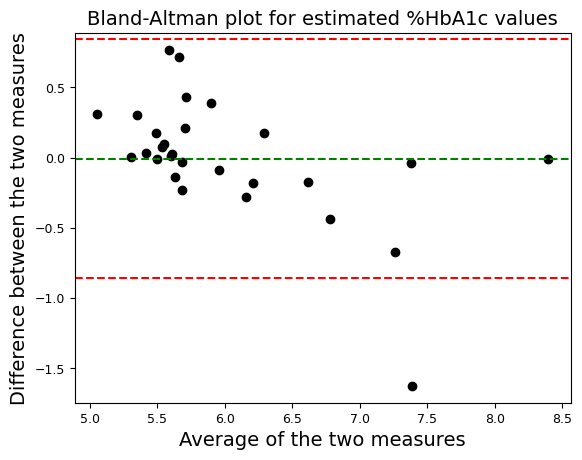

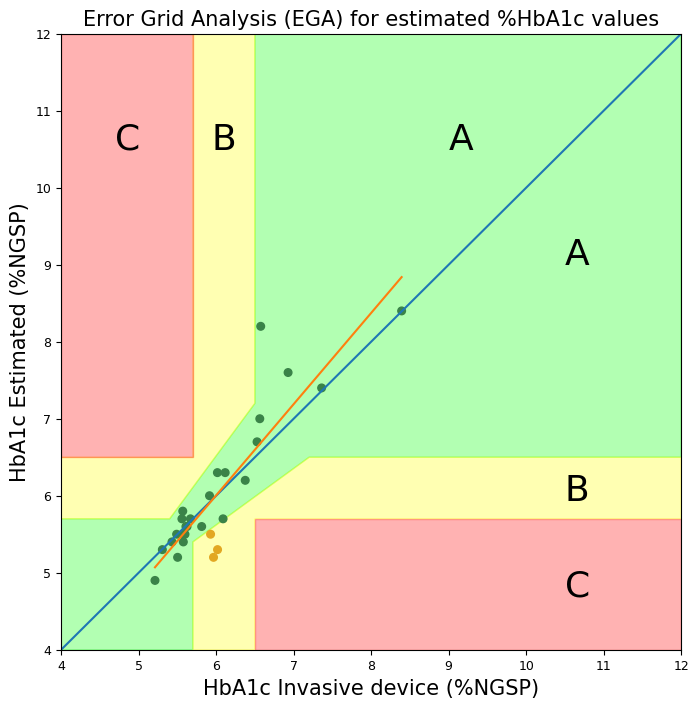

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t1_results_xg,
    exactValue     = t1_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.6248714308694523
MSE       =  0.3938975400348054
ME        =  -0.05859381296663391
MAD       =  0.5005528316582321
RMSE      =  0.6276125716035375
R2 score  =  0.516288909688944
Pearson R and p-value:  PearsonRResult(statistic=0.7363539275550559, pvalue=7.933769398765106e-06)
##################################################################################



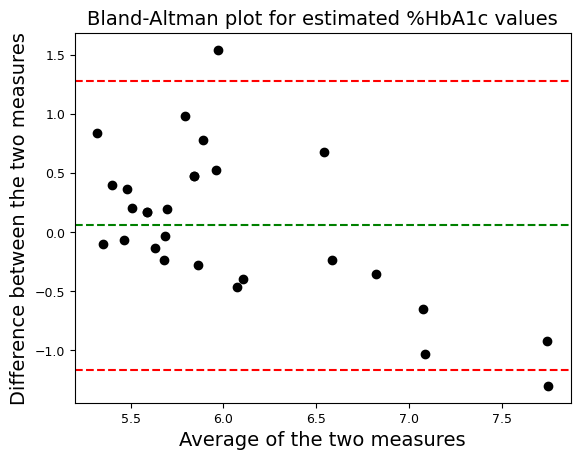

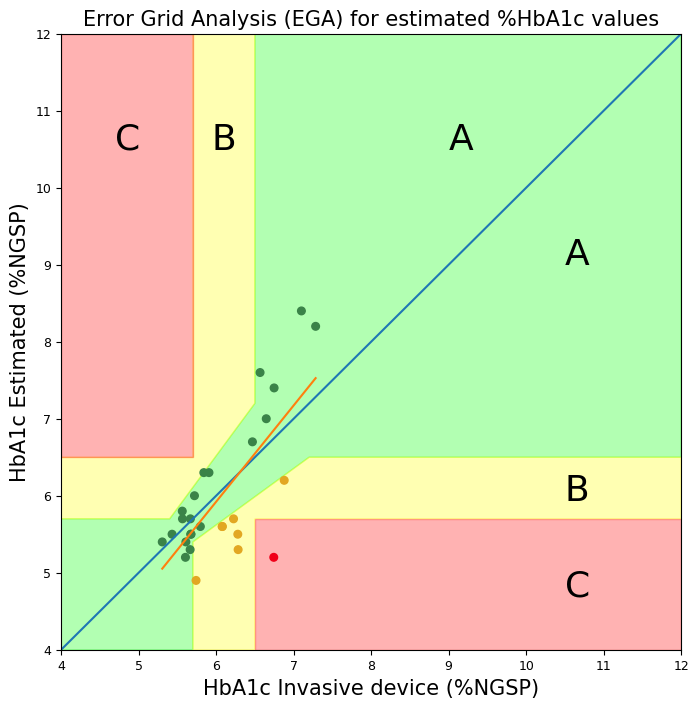

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t1_results_rf,
    exactValue     = t1_e_results_rf
)

############ HbA1c Evaluation Metrics of Cat Boost Regression ############
Diff STD  =  0.42032119167957066
MSE       =  0.1830040163378306
ME        =  -0.07958713566209195
MAD       =  0.36023039975917914
RMSE      =  0.42778968704005776
R2 score  =  0.7752687862273716
Pearson R and p-value:  PearsonRResult(statistic=0.9100059545429023, pvalue=1.9332965244506028e-11)
##################################################################################



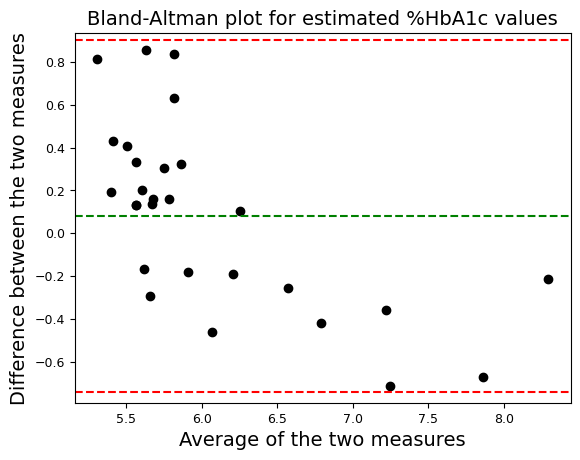

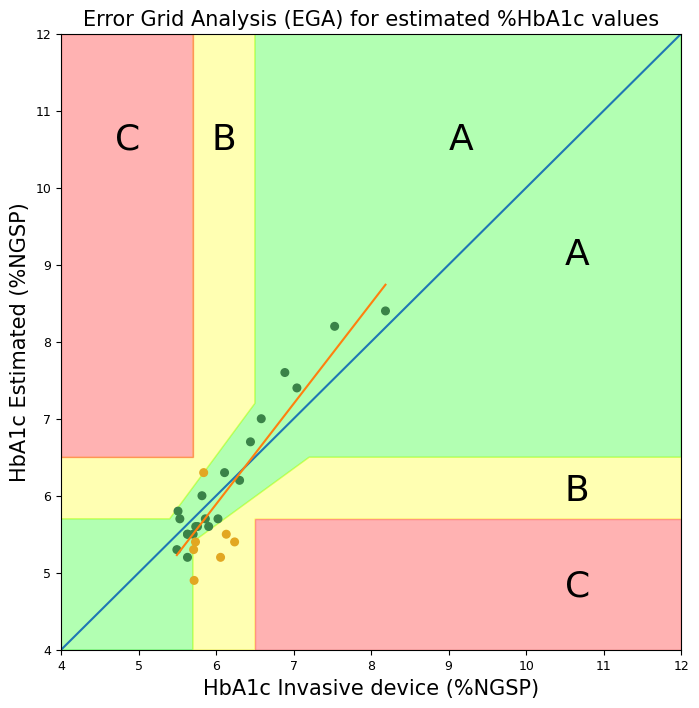

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Cat Boost',
    predictedValue = t1_results_cb,
    exactValue     = t1_e_results_cb
)

############ HbA1c Evaluation Metrics of Light GBM Regression ############
Diff STD  =  0.7863903394414637
MSE       =  0.6188738283927435
ME        =  0.021542108204233777
MAD       =  0.5639089541408957
RMSE      =  0.7866853426833015
R2 score  =  0.24001522256173613
Pearson R and p-value:  PearsonRResult(statistic=0.5237261696872355, pvalue=0.004232595756385208)
##################################################################################



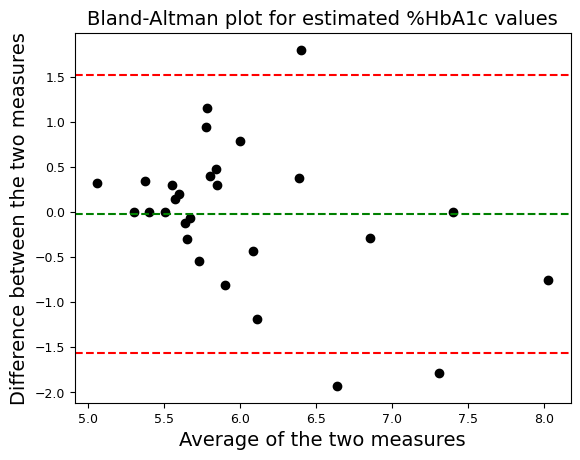

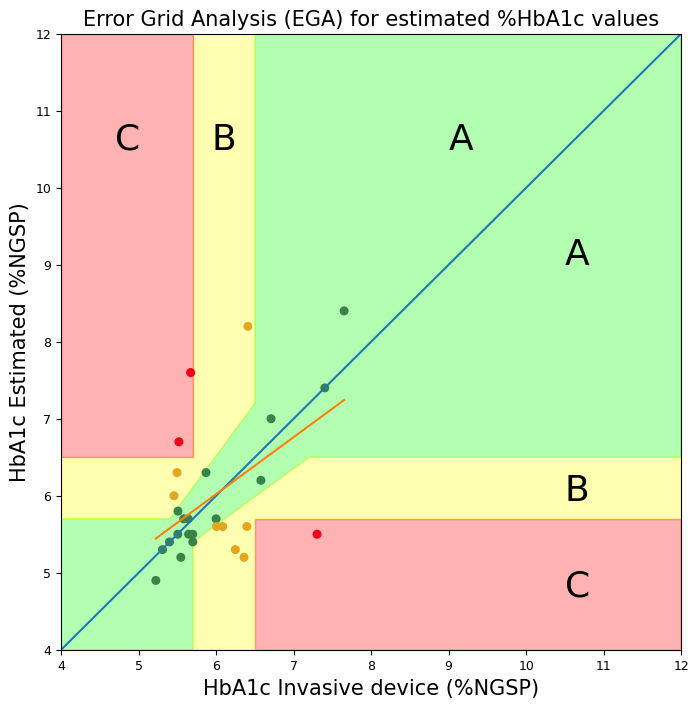

In [ ]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Light GBM',
    predictedValue = t1_results_lg,
    exactValue     = t1_e_results_lg
)

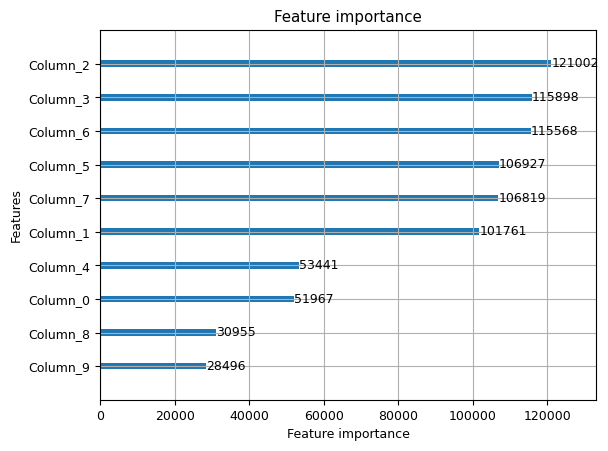

In [ ]:
ltb.plot_importance(booster= lg)
plt.show()

## __Test 02:__

>  Utilizing __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=4+4+4+SpO2+BMI=13)_

In [19]:
# Initialize
loo                = sk.model_selection.LeaveOneOut()
t2_scores          = []
t2_test_cases      = []
t2_train_cases     = []
countEpoch         = 0
percent            = 0.02
# XG Boost
t2_results_xg      = []
t2_e_results_xg    = []
# Random Forest
t2_results_rf      = []
t2_e_results_rf    = []
# Cat Boost
t2_results_cb      = []
t2_e_results_cb    = []
# Light GBM
t2_results_lg      = []
t2_e_results_lg    = []

for train_index, test_index in loo.split(PPG_csvArray):
    print('Epoch # '+str(countEpoch))
    countEpoch +=1

    X_train, X_test      = PPG_csvArray[train_index], PPG_csvArray[test_index]
    y_train, y_test      = HbA1c_Array [train_index], HbA1c_Array [test_index]
    sp_train, sp_test    = SpO2_Array  [train_index], SpO2_Array  [test_index]
    bmi_train, bmi_test  = BMI_Array   [train_index], BMI_Array   [test_index]
    
    
    # > __Algorithm 06v2:__ Constructing Features Set _(Red, Green, Blue; Reflected, FeatureCount=4+4+r1+r2+SpO2+BMI=13)_
    print('*************************************************************')
    print('*********************Training Array Set**********************')
    print('*************************************************************')
    train_array = construct_feature_set_v2(
        PPG          = X_train,
        HbA1c        = y_train,
        SpO2         = sp_train,
        BMI          = bmi_train,
        samplingRate = 32
        )
    print('*************************************************************')
    print('*********************Testing Array Set***********************')
    print('*************************************************************')
    test_array  = construct_feature_set_v2(
        PPG          = X_test,
        HbA1c        = y_test,
        SpO2         = sp_test,
        BMI          = bmi_test,
        samplingRate = 32
        )
    
    feature_train, hba1c_train = train_array[:,:-1], train_array[:,-1]
    feature_test, hba1c_test   = test_array[:,:-1],  test_array[:,-1]
    
    train = np.sort(np.array(random.sample(range(feature_test.shape[0]), int(feature_test.shape[0] * percent))))
    if train.shape[0] == 0:
        feature_train, hba1c_train = np.append(feature_train, np.expand_dims(feature_test[0],axis=0), 0), np.append(hba1c_train, np.expand_dims(hba1c_test[0],axis=0), 0)
        # feature_test, hba1c_test = np.delete(feature_test, 0, axis = 0), np.delete(hba1c_test, 0, axis = 0)
    else:
        test = np.delete(np.arange(feature_test.shape[0]), train)

        feature_train, hba1c_train = np.append(feature_train, feature_test[train], 0), np.append(hba1c_train, hba1c_test[train], 0)
        feature_test, hba1c_test = np.delete(feature_test, train, axis = 0), np.delete(hba1c_test, train, axis = 0)
    
    feature_train, hba1c_train = sk.utils.shuffle(feature_train, hba1c_train, random_state=0)
    # print(feature_train.shape)
    # print(feature_test.shape)

    # XGboost
    xg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)
    xg.fit(feature_train, hba1c_train)
    t2_results_xg.append(np.nanmean(xg.predict(feature_test)))
    t2_e_results_xg.append(np.nanmean(hba1c_test))

    # Random Forest
    rf = RandomForestRegressor(random_state=42, n_estimators=1000, n_jobs=-1)
    rf.fit(feature_train, hba1c_train)
    t2_results_rf.append(np.nanmean(rf.predict(feature_test)))
    t2_e_results_rf.append(np.nanmean(hba1c_test))

    # Cat boost
    cb = cab.CatBoostRegressor(depth=3, l2_leaf_reg=5)
    cb.fit(feature_train, hba1c_train)
    t2_results_cb.append(np.nanmean(cb.predict(feature_test)))
    t2_e_results_cb.append(np.nanmean(hba1c_test))

    # Light GBM
    lg = ltb.LGBMRegressor(
    application='regression',
    objective='root_mean_squared_error',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    min_data_in_leaf=5,
    metric='rmse',
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    random_state=42,
    n_estimators=500
        )
    lg.fit(feature_train, hba1c_train)
    t2_results_lg.append(np.nanmean(lg.predict(feature_test)))
    t2_e_results_lg.append(np.nanmean(hba1c_test))



    t2_test_cases.append(X_test)
    t2_train_cases.append(X_train)

    clear_output(wait=True)

Epoch # 27
*************************************************************
*********************Training Array Set**********************
*************************************************************
PPG_data_info:./DataBase/Selected_PPG_wrist/210823_4.csv
iCount=0 || jCount=0 || lCount=1 || fCount=11
[9.00000000e+00 7.62846404e+03 2.02207938e+02 1.12935442e+02
 9.00000000e+00 9.35894484e+02 7.34227635e+01 1.49943916e+00
 9.60000000e+01 2.87100000e+01 8.40000000e+00]
iCount=0 || jCount=1 || lCount=2 || fCount=11
[8.00000000e+00 7.97082896e+03 2.06014403e+02 1.22137477e+02
 8.00000000e+00 9.84293050e+02 7.49804034e+01 1.57359576e+00
 9.60000000e+01 2.87100000e+01 8.40000000e+00]
iCount=0 || jCount=2 || lCount=3 || fCount=11
[8.00000000e+00 7.84820780e+03 2.04193070e+02 1.47961630e+02
 8.00000000e+00 1.00091621e+03 7.52064790e+01 2.36208656e+00
 9.60000000e+01 2.87100000e+01 8.40000000e+00]
iCount=0 || jCount=3 || lCount=4 || fCount=11
[8.00000000e+00 7.75336871e+03 2.05739003e+02 1.1403882

> Evaluation of __Test 2__

RB with reduced features wwith bmi and spo2

############ HbA1c Evaluation Metrics of XG Boost Regression ############
Diff STD  =  0.4259619003818428
MSE       =  0.18144735780247095
ME        =  -0.001953772136143022
MAD       =  0.33103603635515494
RMSE      =  0.4259663810707025
R2 score  =  0.7771803823173457
Pearson R and p-value:  PearsonRResult(statistic=0.8892062510380694, pvalue=2.5561487439439865e-10)
##################################################################################



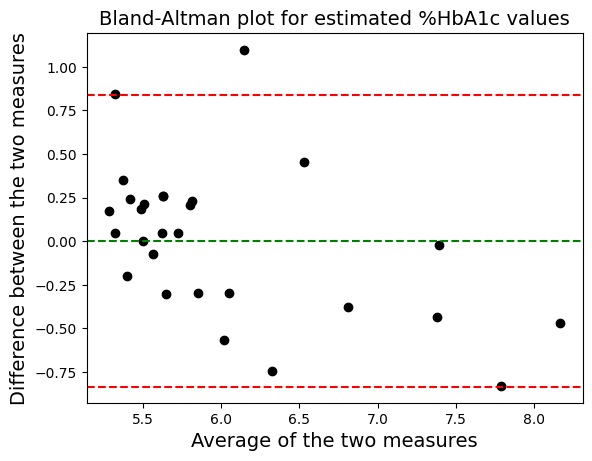

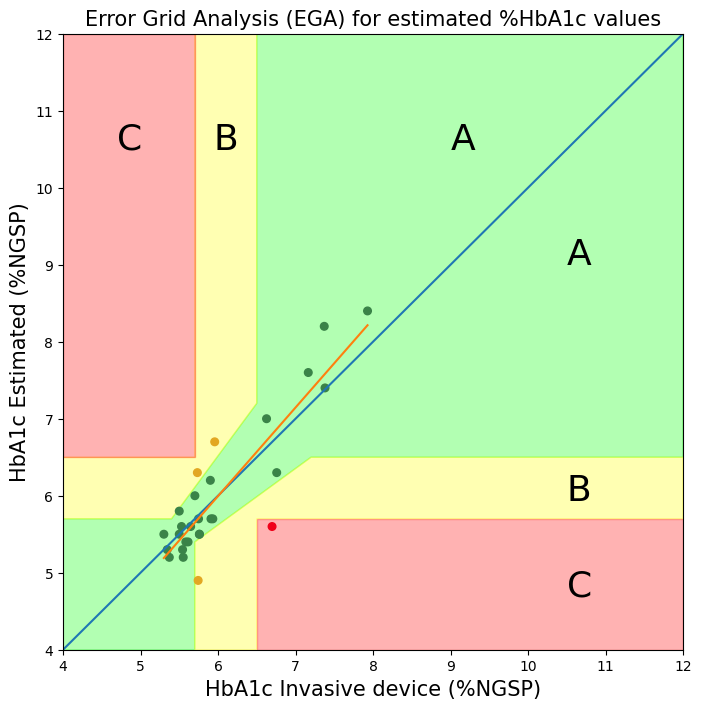

In [20]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'XG Boost',
    predictedValue = t2_results_xg,
    exactValue     = t2_e_results_xg
)

############ HbA1c Evaluation Metrics of Random Forest Regression ############
Diff STD  =  0.5272979135298296
MSE       =  0.2817153927205446
ME        =  -0.06059953058921213
MAD       =  0.39081944699946175
RMSE      =  0.5307686809906408
R2 score  =  0.6540499852874919
Pearson R and p-value:  PearsonRResult(statistic=0.8116031193997283, pvalue=1.5995352478584834e-07)
##################################################################################



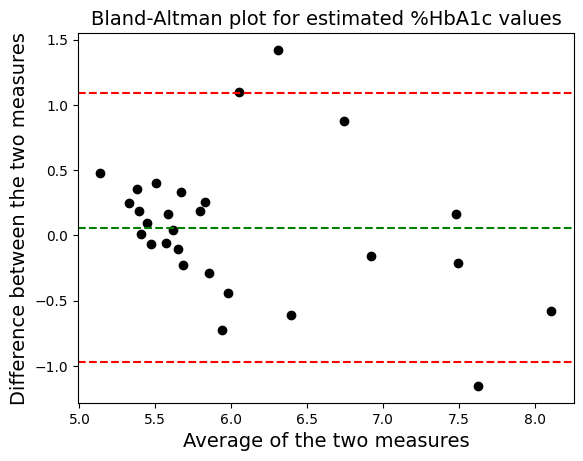

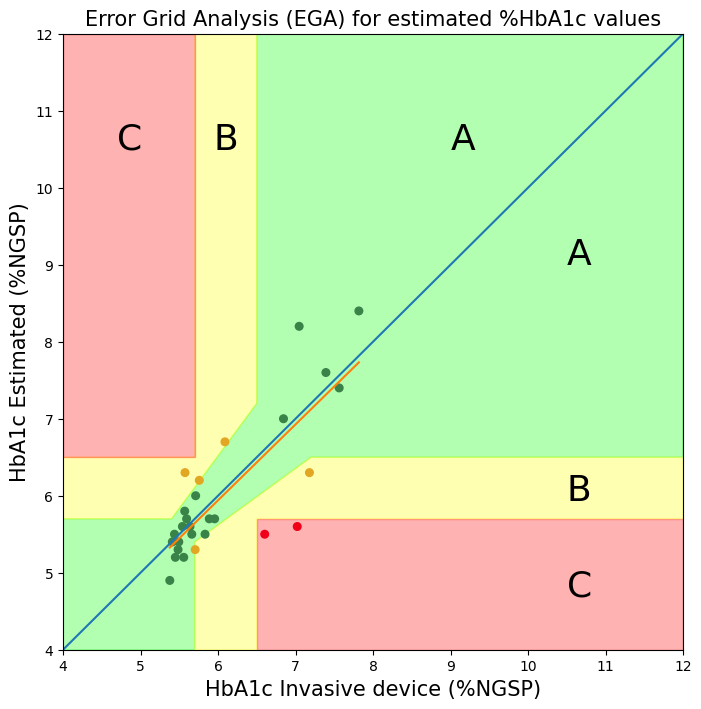

In [21]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Random Forest',
    predictedValue = t2_results_rf,
    exactValue     = t2_e_results_rf
)

############ HbA1c Evaluation Metrics of Cat Boost Regression ############
Diff STD  =  0.5281697474760834
MSE       =  0.2794051618778322
ME        =  0.021020935490184245
MAD       =  0.43722960340050626
RMSE      =  0.528587894183959
R2 score  =  0.6568869775664989
Pearson R and p-value:  PearsonRResult(statistic=0.8204599945913926, pvalue=9.024458210197728e-08)
##################################################################################



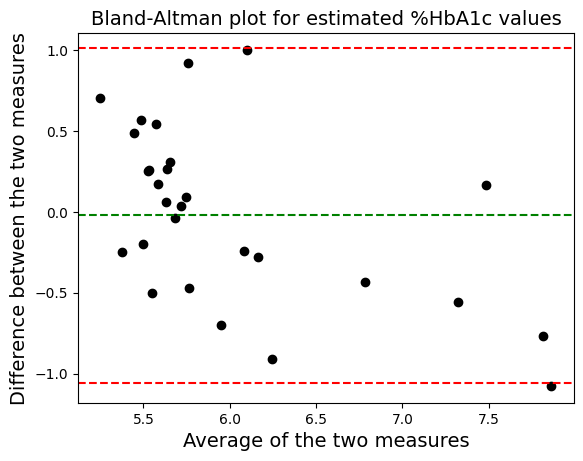

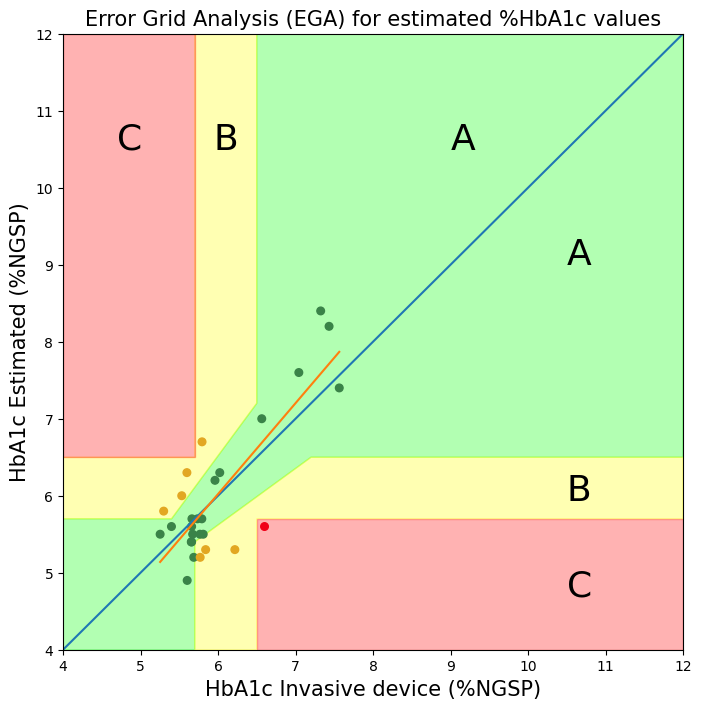

In [22]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Cat Boost',
    predictedValue = t2_results_cb,
    exactValue     = t2_e_results_cb
)

############ HbA1c Evaluation Metrics of Light GBM Regression ############
Diff STD  =  0.6698383504822969
MSE       =  0.4574643702158169
ME        =  -0.09370674703014911
MAD       =  0.5001894031650285
RMSE      =  0.6763611241162645
R2 score  =  0.43822804966997186
Pearson R and p-value:  PearsonRResult(statistic=0.6893756921630495, pvalue=4.960637693220588e-05)
##################################################################################



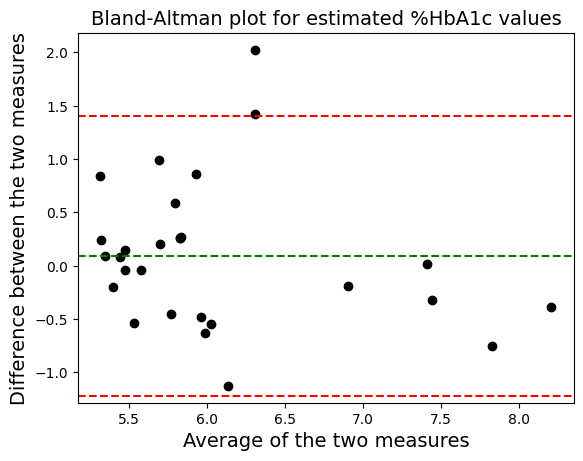

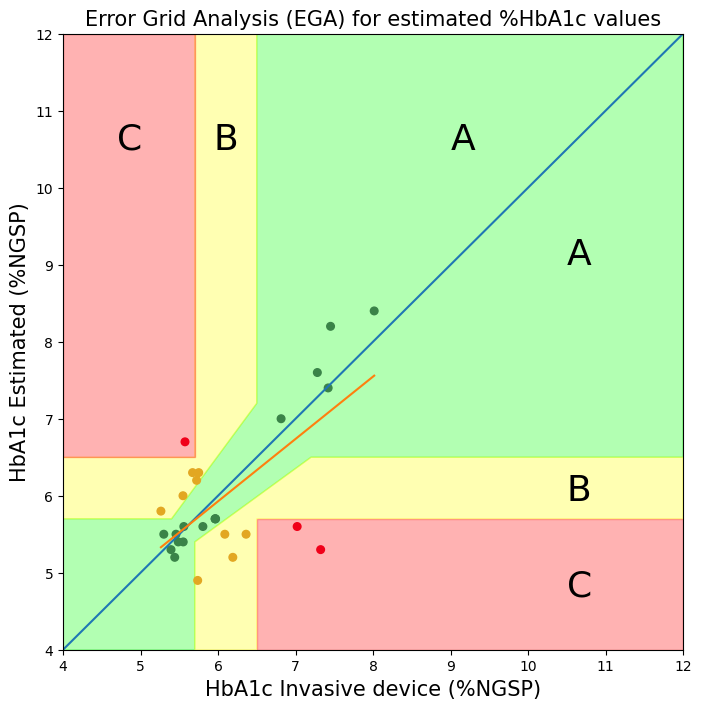

In [23]:
evaluation_metrics_including_BA_and_EGA_plot(
    modelName      = 'Light GBM',
    predictedValue = t2_results_lg,
    exactValue     = t2_e_results_lg
)

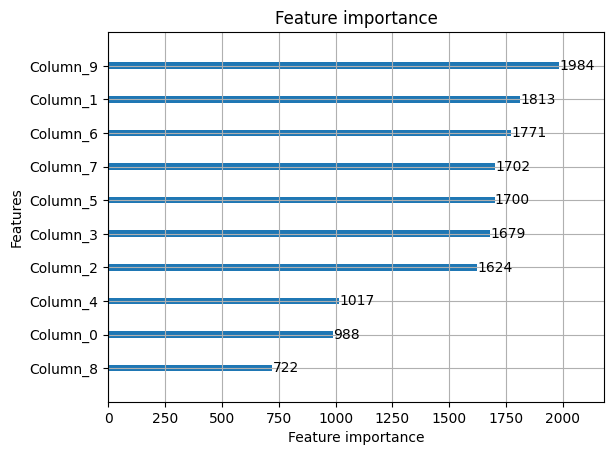

In [24]:
ltb.plot_importance(booster= lg)
plt.show()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
b=lg.feature_importances_
b

array([ 988, 1813, 1624, 1679, 1017, 1700, 1771, 1702,  722, 1984])

In [40]:

features_frame = ['ZCR_red','Auto_correlation_red', 'Sum of Absolute Difference_red', 'KTE Variance_red', 'ZCR_blue','Auto_correlation_blue', 'Sum of Absolute Difference_blue', 'KTE Variance_blue', 'SpO2', 'BMI']

Text(0, 0.5, 'FEATURE NAMES')

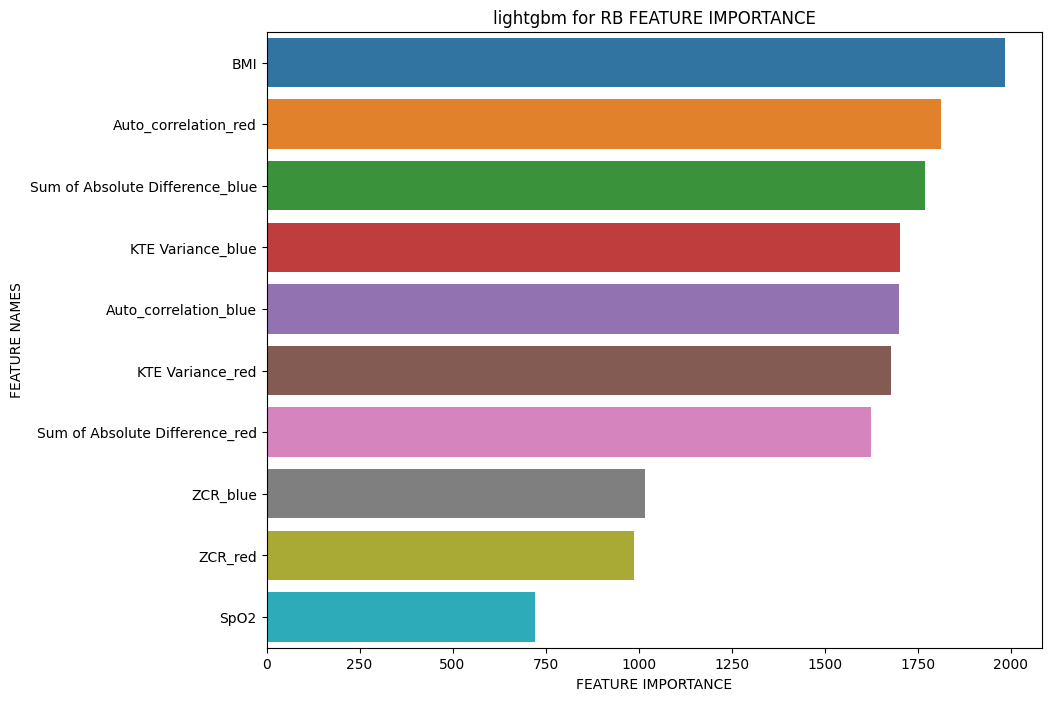

In [44]:

feature_importance = np.array(b)
feature_names = np.array(features_frame)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('lightgbm for RB' + ' ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')